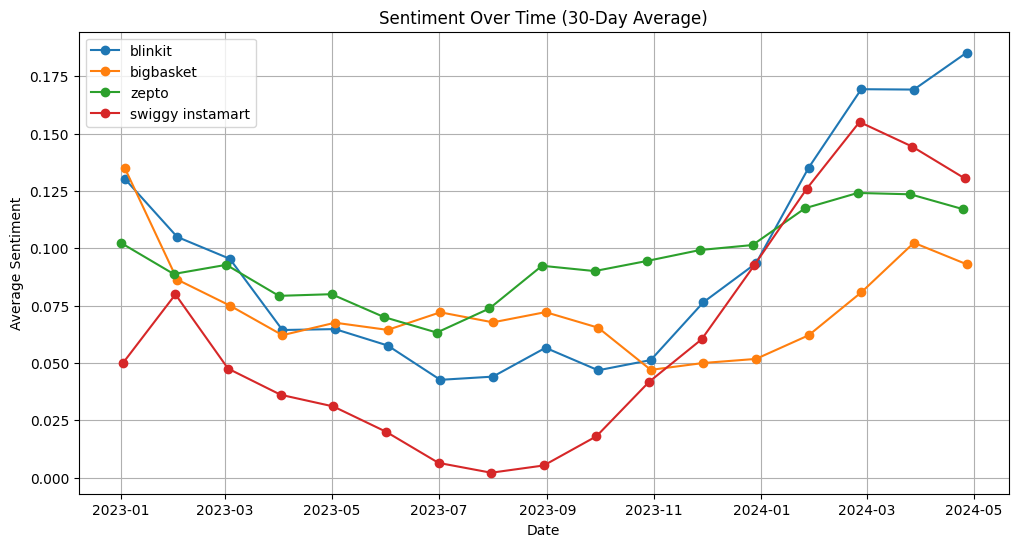

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each CSV file
def process_csv(file_path,window=5):
    df = pd.read_csv(file_path)
    df['createdAt'] = pd.to_datetime(df['createdAt'])
    sentiment_over_time = df.resample('30D', on='createdAt')['polarity'].mean()
    sentiment_smoothed = sentiment_over_time.rolling(window=window, min_periods=1).mean()
    return sentiment_smoothed

# File paths
files = ['blinkit_processed_tweets.csv', 'bigbasket_processed_tweets.csv', 'zepto_processed_tweets.csv', 'swiggyinstamart_processed_tweets.csv']
legend_names = ['blinkit', 'bigbasket', 'zepto', 'swiggy instamart']
# Process each file
sentiments = [process_csv(file) for file in files]

# Plotting
plt.figure(figsize=(12, 6))

# Plot each sentiment data on the same graph
for sentiment, name in zip(sentiments, legend_names):
    plt.plot(sentiment, marker='o', linestyle='-', label=name)

# Customizing the plot
plt.title('Sentiment Over Time (30-Day Average)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
